In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2021-10-27 12:33:27.722651: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
train_df = pd.read_csv("datasets/ventilation/train.csv")
test_df = pd.read_csv("datasets/ventilation/test.csv")

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024000 entries, 0 to 4023999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
dtypes: float64(2), int64(5)
memory usage: 214.9 MB


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [6]:
train_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6036000.0,3.018000e+06,1.742443e+06,1.000000,1.509001e+06,3.018000e+06,4.527000e+06,6.036000e+06
breath_id,6036000.0,6.283886e+04,3.633526e+04,1.000000,3.137700e+04,6.276550e+04,9.430100e+04,1.257490e+05
R,6036000.0,2.703618e+01,1.959549e+01,5.000000,5.000000e+00,2.000000e+01,5.000000e+01,5.000000e+01
C,6036000.0,2.608072e+01,1.715231e+01,10.000000,1.000000e+01,2.000000e+01,5.000000e+01,5.000000e+01
time_step,6036000.0,1.307225e+00,7.659778e-01,0.000000,6.428995e-01,1.308123e+00,1.965502e+00,2.937238e+00
u_in,6036000.0,7.321615e+00,1.343470e+01,0.000000,3.936623e-01,4.386146e+00,4.983895e+00,1.000000e+02
u_out,6036000.0,6.204493e-01,4.852752e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
pressure,6036000.0,1.122041e+01,8.109703e+00,-1.895744,6.329607e+00,7.032628e+00,1.364103e+01,6.482099e+01


R distribution and C
Lung attribute indicating how restricted the airway is

C - lung attribute indicating how compliant the lung is (in mL/cmH2O).
Physically, this is the change in volume per change in pressure. Intuitively, one can imagine the same balloon example. We can change C by changing the thickness of the balloon’s latex, with higher C having thinner latex and easier to blow.


                         Normal lungs	ARDS
    Compliance (ml/cmH2O)	50–60	35–45
    Resistance (cmH2O/(l/s))	10–15	10–15
    Expiratory time constant (s)	0.5–0.7	0.4–0.6



In [8]:
train_df.query("pressure<0")

,id,breath_id,R,C,time_step,u_in,u_out,pressure
28720,28721,542,50,10,0.000000,0.000000,0,-1.825442
28721,28722,542,50,10,0.033468,0.074189,0,-1.825442
28722,28723,542,50,10,0.066892,0.143197,0,-1.755140
28723,28724,542,50,10,0.100245,0.208192,0,-1.825442
28724,28725,542,50,10,0.133618,0.268278,0,-1.684838
...,...,...,...,...,...,...,...,...
5979915,5979916,124575,50,10,2.504311,0.057006,1,-0.700608
5979916,5979917,124575,50,10,2.537637,0.057709,1,-0.770910
5979917,5979918,124575,50,10,2.570976,0.058412,1,-0.841212
5979918,5979919,124575,50,10,2.604315,0.057709,1,-0.770910


<AxesSubplot:>

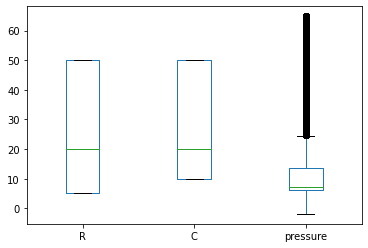

In [9]:
train_df[['R', 'C', 'pressure']].plot(kind='box')

In [10]:
train_df['log_pressure'] = np.log(train_df['pressure']+0.1)

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

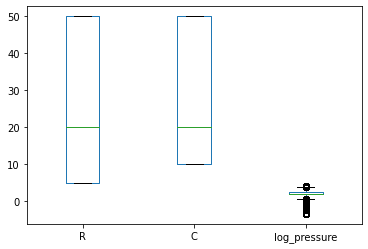

In [11]:
train_df[['R', 'C', 'log_pressure']].plot(kind='box')

In [12]:
# u_in goes from 0 to 100.
# u_out foes from 0 to 1.

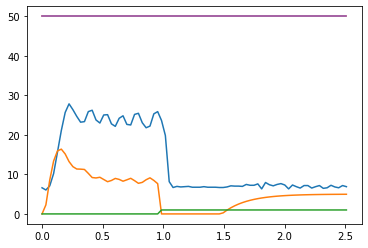

In [13]:
breath_sample = train_df.query("breath_id==10").sort_values(by='time_step')

selonid_in_valve = breath_sample.u_in

plt.plot(breath_sample.time_step, breath_sample.pressure)

plt.plot(breath_sample.time_step, breath_sample.u_in)

plt.plot(breath_sample.time_step, breath_sample.u_out)

plt.plot(breath_sample.time_step, breath_sample.R)

plt.plot(breath_sample.time_step, breath_sample.C)

<AxesSubplot:>

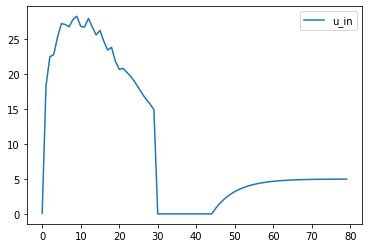

In [14]:
train_df.query("breath_id==1").sort_values(['breath_id', 'time_step'],
                                           ascending=True)[['u_in']].plot()

(array([[2.899e+03, 1.712e+03, 2.089e+03, ..., 3.100e+01, 8.000e+00,
         2.000e+00],
        [1.000e+00, 3.400e+01, 3.780e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 1.000e+00, 1.780e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 array([-1.89574429, -0.56140957,  0.77292515,  2.10725987,  3.44159459,
         4.77592931,  6.

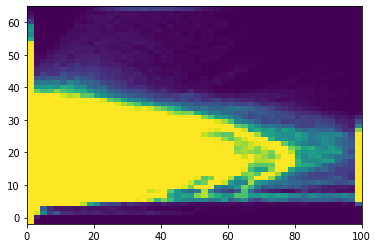

In [15]:
plt.hist2d(train_df['u_in'], train_df['pressure'], bins=(50, 50), vmax=400)

(array([[1141.,  718., 2406., ...,  264.,  202., 1066.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [1759., 1029., 1011., ...,    0.,    0.,    0.]]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 array([-1.89574429, -0.56140957,  0.77292515,  2.10725987,  3.44159459,
         4.77592931,  6.11026403,  7.44459875,  8.77893347, 10.11326819,
        11.44760291, 12.78193763, 14.11627235, 15.45060707, 16.78494179,
        18.11927652, 19.45361124, 20.78794596, 22.12228068, 23.4566154 ,
   

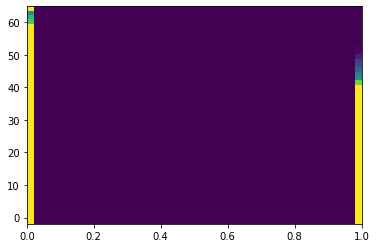

In [16]:
plt.hist2d(train_df['u_out'], train_df['pressure'], bins=(50, 50), vmax=400)

In [17]:
total_u_in = train_df.u_in.max() #per steps

In [18]:
#train

In [19]:
#log scale

train_df['log_u_in']=np.log(train_df['u_in']+0.001)

test_df['log_u_in']=np.log(test_df['u_in']+0.001)

train_df['log_R']=np.log(train_df['R']+0.001)

test_df['log_R']=np.log(test_df['R']+0.001)

train_df['log_C']=np.log(train_df['C']+0.001)

test_df['log_C']=np.log(test_df['C']+0.001)

In [20]:
u_in = train_df['u_in'].copy()

u_in_test = test_df['u_in'].copy()

In [21]:
#over 3 time steps

sin_u_in = u_in*np.sin(2*np.pi*(u_in/3))

cos_u_in = u_in*np.cos(2*np.pi*(u_in/3))

train_df['sin_u_in'] = sin_u_in

train_df['cos_u_in'] = cos_u_in

In [22]:
#test

In [23]:
sin_u_in_test = u_in_test*np.sin(2*np.pi*(u_in_test/3))

cos_u_in_test = u_in_test*np.cos(2*np.pi*(u_in_test/3))

test_df['sin_u_in'] = sin_u_in_test

test_df['cos_u_in'] = cos_u_in_test

In [24]:
#time_step

time_step = train_df['time_step'].copy()

sin_time_step = np.sin(2*np.pi*(time_step/3))

cos_time_step = np.cos(2*np.pi*(time_step/3))

train_df['sin_time_step'] = sin_time_step

train_df['cos_time_step'] = cos_time_step

<AxesSubplot:>

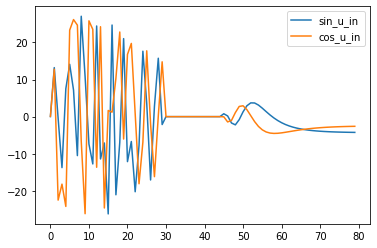

In [25]:
train_df.query("breath_id==1").sort_values(['breath_id', 'time_step'],
                                           ascending=True)[['sin_u_in', 'cos_u_in']].plot()

<AxesSubplot:>

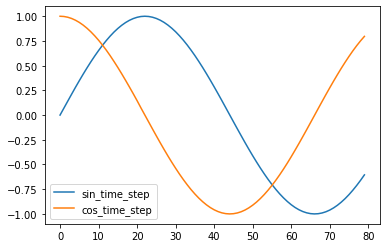

In [26]:
train_df.query("breath_id==1").sort_values(['breath_id', 'time_step'],
                                           ascending=True)[['sin_time_step', 'cos_time_step']].plot()

<AxesSubplot:>

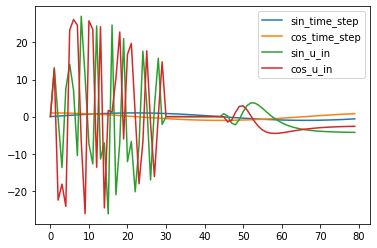

In [27]:
train_df.query("breath_id==1").sort_values(['breath_id', 'time_step'],
                                           ascending=True)[['sin_time_step', 'cos_time_step', 'sin_u_in', 'cos_u_in']].plot()

In [28]:
#time_step

time_step = test_df['time_step'].copy()

sin_time_step = np.sin(2*np.pi*(time_step/3))

cos_time_step = np.cos(2*np.pi*(time_step/3))

test_df['sin_time_step'] = sin_time_step

test_df['cos_time_step'] = cos_time_step

In [29]:
test_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,log_u_in,log_R,log_C,sin_u_in,cos_u_in,sin_time_step,cos_time_step
0,1,0,5,20,0.000000,0.000000,0,-6.907755,1.609638,2.995782,0.000000,0.000000,0.000000,1.000000
1,2,0,5,20,0.031904,7.515046,0,2.017040,1.609638,2.995782,-0.236770,-7.511315,0.066769,0.997768
2,3,0,5,20,0.063827,14.651675,0,2.684623,1.609638,2.995782,-9.765618,10.922651,0.133282,0.991078
3,4,0,5,20,0.095751,21.230610,0,3.055491,1.609638,2.995782,9.860087,18.802061,0.199199,0.979959
4,5,0,5,20,0.127644,26.320956,0,3.270403,1.609638,2.995782,-26.030842,3.897177,0.264163,0.964478


<AxesSubplot:>

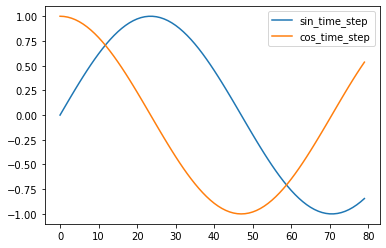

In [30]:
test_df.query("breath_id==0").sort_values(['breath_id', 'time_step'],
                                           ascending=True)[['sin_time_step', 'cos_time_step']].plot()

In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024000 entries, 0 to 4023999
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   breath_id      int64  
 2   R              int64  
 3   C              int64  
 4   time_step      float64
 5   u_in           float64
 6   u_out          int64  
 7   log_u_in       float64
 8   log_R          float64
 9   log_C          float64
 10  sin_u_in       float64
 11  cos_u_in       float64
 12  sin_time_step  float64
 13  cos_time_step  float64
dtypes: float64(9), int64(5)
memory usage: 429.8 MB


In [32]:
#log scale

train_df['log_u_in']=np.log(train_df['u_in']+0.001)

test_df['log_u_in']=np.log(test_df['u_in']+0.001)

train_df['log_R']=np.log(train_df['R']+0.001)

test_df['log_R']=np.log(test_df['R']+0.001)

train_df['log_C']=np.log(train_df['C']+0.001)

test_df['log_C']=np.log(test_df['C']+0.001)

In [33]:
target = ['pressure']
features = ['log_R', 'log_C', 'sin_u_in', 'cos_u_in', 'u_out', 'sin_time_step', 'cos_time_step']
# features = ['R', 'C', 'u_in', 'u_out', 'sin_time_step', 'cos_time_step']
# features = ['log_R', 'log_C', 'log_u_in', 'u_out', 'sin_time_step', 'cos_time_step', 'u_out']

<AxesSubplot:>

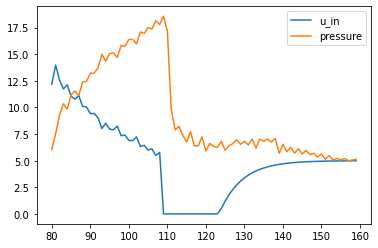

In [34]:
train_df.query("breath_id==2").sort_values(['breath_id', 'time_step'],
                                           ascending=True)[['u_in', 'pressure']].plot()

<AxesSubplot:>

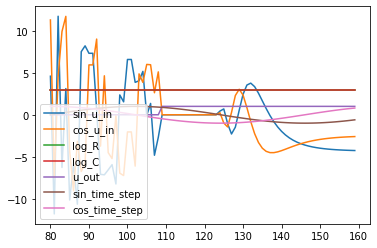

In [35]:
train_df.query("breath_id==2").sort_values(['breath_id', 'time_step'],
                                           ascending=True)[['sin_u_in', 'cos_u_in', 'log_R', 'log_C', 'u_out', 'sin_time_step', 'cos_time_step']].plot()


In [36]:
train_df.groupby(by=['breath_id']).size()[train_df.groupby(by=['breath_id']).size()>80]

Series([], dtype: int64)

In [37]:
test_df.groupby(by=['breath_id']).size()[test_df.groupby(by=['breath_id']).size()<80]

Series([], dtype: int64)

Each secuence has 80 points or timesteps

Dataset has 1 row per timestep 

the first 80 rows belong to the first series. My window lenght is 80 and the stride is 80 with 4 features.

In [38]:
test_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,log_u_in,log_R,log_C,sin_u_in,cos_u_in,sin_time_step,cos_time_step
0,1,0,5,20,0.000000,0.000000,0,-6.907755,1.609638,2.995782,0.000000,0.000000,0.000000,1.000000
1,2,0,5,20,0.031904,7.515046,0,2.017040,1.609638,2.995782,-0.236770,-7.511315,0.066769,0.997768
2,3,0,5,20,0.063827,14.651675,0,2.684623,1.609638,2.995782,-9.765618,10.922651,0.133282,0.991078
3,4,0,5,20,0.095751,21.230610,0,3.055491,1.609638,2.995782,9.860087,18.802061,0.199199,0.979959
4,5,0,5,20,0.127644,26.320956,0,3.270403,1.609638,2.995782,-26.030842,3.897177,0.264163,0.964478


In [39]:
# First thing should be to order the dataset by breath_id and time_step

train_ordered_features_df = train_df.sort_values(['id', 'breath_id', 'time_step'], ascending=True)[features].copy()

test_ordered_features_df = test_df.sort_values(['id', 'breath_id', 'time_step'], ascending=True)[features].copy()

In [40]:
train_ordered_features_df.head(10)

,log_R,log_C,sin_u_in,cos_u_in,u_out,sin_time_step,cos_time_step
0,2.995782,3.912043,0.014471,0.082068,0,0.000000,1.000000
1,2.995782,3.912043,13.215845,12.778014,0,0.070423,0.997517
2,2.995782,3.912043,-0.437357,-22.505028,0,0.140931,0.990019
3,2.995782,3.912043,-13.745338,-18.201870,0,0.211070,0.977471
4,2.995782,3.912043,7.539333,-24.209040,0,0.280510,0.959851
5,2.995782,3.912043,14.114795,23.321081,0,0.347979,0.937502
6,2.995782,3.912043,7.157426,26.166233,0,0.413819,0.910359
7,2.995782,3.912043,-10.505698,24.663430,0,0.477568,0.878595
8,2.995782,3.912043,27.064337,-6.630536,0,0.538964,0.842329
9,2.995782,3.912043,10.805570,-26.169976,0,0.597455,0.801903


In [41]:
# Those 2 should be the same

In [42]:
train_ordered_target_df = train_df.sort_values(['id', 'breath_id', 'time_step'], ascending=True)[target].copy()

In [43]:
train_ordered_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036000 entries, 0 to 6035999
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   log_R          float64
 1   log_C          float64
 2   sin_u_in       float64
 3   cos_u_in       float64
 4   u_out          int64  
 5   sin_time_step  float64
 6   cos_time_step  float64
dtypes: float64(6), int64(1)
memory usage: 368.4 MB
